In [1]:
import pandas as pd
import numpy as np
import functions
import plotly.express as px

First we start by importing the csv file created in the `"data_manipulation.ipynb"` file 

In [2]:
df = pd.read_csv("data/final.csv")
df = df.drop(columns='Unnamed: 0')

We are gonna see some results based on different units of analysis.

### Italy (*national level*)

The first unit of analysis taken into consideration will be the **Italian territory** as a whole:

* We will see the **total number** of **crimes** reported in the time span taken into consideration, and we will compute the **average** per year;
* We will check the **years** with the **maximum** and **minimum** amount;
* We will compute the **trend** from `2006` to `2021`, to see if the numbers are **increasing** or **decreasing**.

In [3]:
# Finding the number of crimes reported in the time span taken into consideration
year_and_total_values = df.loc[df['Crime'] == 'totale'].groupby(['Year']).sum(numeric_only=True)['Value']


print(f"Overall, in the 16 years taken into consideration, {sum(year_and_total_values)} crimes were reported.",
        f"\nA mean of {round(sum(year_and_total_values)/len(year_and_total_values))} per year and {round((sum(year_and_total_values)/len(year_and_total_values) / 365))} per day",
        f"\nA standard deviation of {round(np.std(year_and_total_values))}.")

px.bar(data_frame= year_and_total_values.reset_index(),
       x = 'Year',
       y = 'Value',
       title= 'Trend of the total number of crimes reported over the years in Italy')

Overall, in the 16 years taken into consideration, 41196129 crimes were reported. 
A mean of 2574758 per year and 7054 per day 
A standard deviation of 281984.


In [4]:
# Finding the year with the maximum crimes reported
print('Max:\n', year_and_total_values[year_and_total_values == max(year_and_total_values)])

# Finding the year with the minimum crimes reported
print('\nMin:\n',year_and_total_values[year_and_total_values == min(year_and_total_values)])

Max:
 Year
2007    2929755
Name: Value, dtype: int64

Min:
 Year
2020    1898784
Name: Value, dtype: int64


In [5]:
px.bar(data_frame= df.loc[df['Crime'] != 'totale'].groupby(['Crime', 'Year']).sum(numeric_only=True).sort_values(by='Value', ascending=False).reset_index(),
       x = 'Year',
       y = 'Value',
       color= 'Crime',
       title= 'Trend of the different types of crime reported over the years in Italy')

Now, with a manually created function we are gonna see the crimes that **increased** and **decreased** the most over the years at national level

In [11]:
italy_crime_year_groupby_sum_values = df.groupby(['Crime', 'Year']).sum(numeric_only= True)['Value'].reset_index()

italy_increasing_rates = functions.find_increasing_rates(italy_crime_year_groupby_sum_values)
print('The crimes that increased over Italy in the time period taken into consideration are: \n', italy_increasing_rates)

threshold = -0.50
italy_decreasing_rates = functions.find_decreasing_rates(italy_crime_year_groupby_sum_values, threshold= threshold)
print(f"\nThe crimes that had a decrease higher than {threshold} are the following: \n", italy_decreasing_rates)

The crimes that increased over Italy in the time period taken into consideration are: 
 {'altri delitti': '28.76%', 'atti sessuali con minorenne': '6.09%', 'contraffazione di marchi e prodotti industriali': '55.69%', 'delitti informatici': '823.49%', 'estorsioni': '86.38%', 'percosse': '9.55%', 'pornografia minorile e detenzione di materiale pedopornografico': '258.66%', 'riciclaggio e impiego di denaro, beni o utilità di provenienza illecita': '14.46%', 'strage': '16.00%', 'truffe e frodi informatiche': '170.75%', 'violenze sessuali': '16.91%'}

The crimes that had a decrease higher than -0.5 are the following: 
 {'attentati': '-65.52%', 'contrabbando': '-54.78%', 'furti di automezzi pesanti trasportanti merci': '-87.46%', 'furti di autovetture': '-54.98%', 'furti di ciclomotori': '-83.16%', 'furti di motocicli': '-58.66%', "furti di opere d'arte e materiale archeologico": '-76.54%', 'furti in auto in sosta': '-64.61%', 'infanticidi': '-100.00%', 'omicidi volontari consumati': '-51.05

### North East (*macro-area level*)

The second **unit of analysis** taken into consideration will be the **North-East** macro-area.

We are gonna perform the same operation we did with the previous unit of analysis.

In [17]:
north_east_df = functions.get_zone_df(df, area='Nord-est')
north_east_total_values = north_east_df.loc[north_east_df['Crime'] == 'totale'].groupby(['Year']).sum(numeric_only=True)['Value']


print(f"Overall, in the 16 years taken into consideration, in the North-East area {sum(north_east_total_values)} crimes were reported.",
        f"\nA mean of {round(sum(north_east_total_values)/len(north_east_total_values))} per year and {round((sum(north_east_total_values)/len(north_east_total_values) / 365))} per day",
        f"\nA standard deviation of {round(np.std(north_east_total_values))}.")

px.bar(data_frame= north_east_total_values.reset_index(),
       x = 'Year',
       y = 'Value',
       title= 'Trend of the total number of crimes reported over the years in the North-East macro area')

Overall, in the 16 years taken into consideration, in the North-East area 7726637 crimes were reported. 
A mean of 482915 per year and 1323 per day 
A standard deviation of 56176.


In [18]:
# Finding the year with the maximum crimes reported
print('Max:\n', north_east_total_values[north_east_total_values == max(north_east_total_values)])

# Finding the year with the minimum crimes reported
print('\nMin:\n',north_east_total_values[north_east_total_values == min(north_east_total_values)])

Max:
 Year
2007    561667
Name: Value, dtype: int64

Min:
 Year
2020    353168
Name: Value, dtype: int64


In [24]:
px.bar(data_frame= north_east_df.loc[north_east_df['Crime'] != 'totale'].groupby(['Crime', 'Year']).sum(numeric_only=True).sort_values(by='Value', ascending=False).reset_index(),
       x = 'Year',
       y = 'Value',
       color= 'Crime',
       title= 'Trend of the different types of crime reported over the years in the North-East area')

Crimes that **increased** and **decreased** the most:

In [20]:
north_east_groupyb_crime_year = north_east_df.groupby(['Crime', 'Year']).sum(numeric_only=True)['Value'].reset_index()

increasing_rates_north_east = functions.find_increasing_rates(north_east_groupyb_crime_year)
print('The crimes that increased over the North-East macro area in the time period taken into consideration are: \n', increasing_rates_north_east)

threshold = -0.50
decreasing_rates_north_east = functions.find_decreasing_rates(north_east_groupyb_crime_year, threshold= threshold)
print(f"\nThe crimes that had a decrease higher than {threshold} are the following: \n", decreasing_rates_north_east)

The crimes that increased over the North-East macro area in the time period taken into consideration are: 
 {'altri delitti': '27.71%', 'contraffazione di marchi e prodotti industriali': '159.38%', 'corruzione di minorenne': '36.84%', 'delitti informatici': '632.28%', 'estorsioni': '191.85%', 'furti in abitazioni': '15.48%', 'incendi boschivi': '59.81%', 'percosse': '1.77%', 'pornografia minorile e detenzione di materiale pedopornografico': '216.28%', 'rapine in abitazione': '5.14%', 'rapine in pubblica via': '25.75%', 'riciclaggio e impiego di denaro, beni o utilità di provenienza illecita': '111.11%', 'truffe e frodi informatiche': '166.75%', 'violenze sessuali': '26.27%'}

The crimes that had a decrease higher than -0.5 are the following: 
 {'associazione di tipo mafioso': '-75.00%', 'contrabbando': '-97.56%', 'furti': '-51.29%', 'furti di automezzi pesanti trasportanti merci': '-85.53%', 'furti di autovetture': '-79.11%', 'furti di ciclomotori': '-87.89%', 'furti di motocicli': '-5

### Emilia Romagna (*regional level*)

The third **unit of analysis** taken into consideration will be the **Emilia Romagna** region.

We are gonna perform the same operation we did with the previous units of analysis.

In [22]:
er_df = functions.get_region_df(df, region='Emilia-Romagna')
er_total_values = er_df.loc[er_df['Crime'] == 'totale'].groupby(['Year']).sum(numeric_only=True)['Value']


print(f"Overall, in the 16 years taken into consideration, in the Emilia Romagna region {sum(er_total_values)} crimes were reported.",
        f"\nA mean of {round(sum(er_total_values)/len(er_total_values))} per year and {round((sum(er_total_values)/len(er_total_values) / 365))} per day",
        f"\nA standard deviation of {round(np.std(er_total_values))}.")

px.bar(data_frame= er_total_values.reset_index(),
       x = 'Year',
       y = 'Value',
       title= 'Trend of the total number of crimes reported over the years in the Emilia Romagna region')

Overall, in the 16 years taken into consideration, in the Emilia Romagna region 3692612 crimes were reported. 
A mean of 230788 per year and 632 per day 
A standard deviation of 27098.


In [23]:
# Finding the year with the maximum crimes reported
print('Max:\n', er_total_values[er_total_values == max(er_total_values)])

# Finding the year with the minimum crimes reported
print('\nMin:\n',er_total_values[er_total_values == min(er_total_values)])

Max:
 Year
2007    265337
Name: Value, dtype: int64

Min:
 Year
2020    166773
Name: Value, dtype: int64


In [25]:
px.bar(data_frame= er_df.loc[er_df['Crime'] != 'totale'].groupby(['Crime', 'Year']).sum(numeric_only=True).sort_values(by='Value', ascending=False).reset_index(),
       x = 'Year',
       y = 'Value',
       color= 'Crime',
       title= 'Trend of the different types of crime reported over the years in the Emilia Romagna region')

In [30]:
er_groupby_crime_year = er_df.groupby(['Crime', 'Year']).sum(numeric_only=True)['Value'].reset_index()

increasing_rates_er = functions.find_increasing_rates(er_groupby_crime_year)
print('The crimes that increased over the North-East macro area in the time period taken into consideration are: \n', increasing_rates_er)

threshold = -0.50
decreasing_rates_er = functions.find_decreasing_rates(er_groupby_crime_year, threshold= threshold)
print(f"\nThe crimes that had a decrease higher than {threshold} are the following: \n", decreasing_rates_er)

The crimes that increased over the North-East macro area in the time period taken into consideration are: 
 {'altri delitti': '65.05%', 'contraffazione di marchi e prodotti industriali': '178.43%', 'corruzione di minorenne': '14.29%', 'delitti informatici': '969.33%', 'estorsioni': '206.00%', 'incendi boschivi': '122.41%', 'omicidi volontari consumati': '3.45%', 'percosse': '13.87%', 'pornografia minorile e detenzione di materiale pedopornografico': '217.86%', 'rapine in abitazione': '21.26%', 'rapine in pubblica via': '36.26%', 'riciclaggio e impiego di denaro, beni o utilità di provenienza illecita': '207.89%', 'truffe e frodi informatiche': '154.21%', 'violenze sessuali': '34.40%'}

The crimes that had a decrease higher than -0.5 are the following: 
 {'associazione di tipo mafioso': '-100.00%', 'attentati': '-65.62%', 'contrabbando': '-100.00%', 'furti': '-51.70%', 'furti di automezzi pesanti trasportanti merci': '-86.81%', 'furti di autovetture': '-78.73%', 'furti di ciclomotori': 

### Ferrara (*provincial level*)
The fourth **unit of analysis** taken into consideration will be the **Ferrara** province.

We are gonna perform the same operation we did with the previous units of analysis.

In [3]:
ferrara_df = functions.get_province_df(df, province='Ferrara')
ferrara_total_values = ferrara_df.loc[ferrara_df['Crime'] == 'totale'].groupby(['Year']).sum(numeric_only=True)['Value']


print(f"Overall, in the 16 years taken into consideration, in the Emilia Romagna region {sum(ferrara_total_values)} crimes were reported.",
        f"\nA mean of {round(sum(ferrara_total_values)/len(ferrara_total_values))} per year and {round((sum(ferrara_total_values)/len(ferrara_total_values) / 365))} per day",
        f"\nA standard deviation of {round(np.std(ferrara_total_values))}.")

px.bar(data_frame= ferrara_total_values.reset_index(),
       x = 'Year',
       y = 'Value',
       title= 'Trend of the total number of crimes reported over the years in the Ferrara province')

Overall, in the 16 years taken into consideration, in the Emilia Romagna region 251587 crimes were reported. 
A mean of 15724 per year and 43 per day 
A standard deviation of 1623.


In [27]:
# Finding the year with the maximum crimes reported
print('Max:\n', ferrara_total_values[ferrara_total_values == max(ferrara_total_values)])

# Finding the year with the minimum crimes reported
print('\nMin:\n',ferrara_total_values[ferrara_total_values == min(ferrara_total_values)])

Max:
 Year
2007    18963
Name: Value, dtype: int64

Min:
 Year
2020    12224
Name: Value, dtype: int64


In [29]:
px.bar(data_frame= ferrara_df.loc[ferrara_df['Crime'] != 'totale'].groupby(['Crime', 'Year']).sum(numeric_only=True).sort_values(by='Value', ascending=False).reset_index(),
       x = 'Year',
       y = 'Value',
       color= 'Crime',
       title= 'Trend of the different types of crime reported over the years in the Ferrara province')

In [5]:
ferrara_groupby_crime_year = ferrara_df.groupby(['Crime', 'Year']).sum(numeric_only=True)['Value'].reset_index()

increasing_rates_ferrara = functions.find_increasing_rates(ferrara_groupby_crime_year)
print('The crimes that increased the most over the Ferrara province in the time period taken into consideration are: \n', increasing_rates_ferrara)

threshold = -0.50
decreasing_rates_ferrara = functions.find_decreasing_rates(ferrara_groupby_crime_year, threshold= threshold)
print(f"\nThe crimes that had a decrease higher than {threshold} are the following: \n", decreasing_rates_ferrara)

The crimes that increased the most over the Ferrara province in the time period taken into consideration are: 
 {'altri delitti': '57.33%', 'associazione per delinquere': '300.00%', 'delitti informatici': '2112.50%', 'estorsioni': '145.00%', 'furti con strappo': '37.14%', 'omicidi volontari consumati': '100.00%', 'percosse': '12.98%', 'pornografia minorile e detenzione di materiale pedopornografico': '500.00%', 'rapine in abitazione': '30.00%', 'rapine in esercizi commerciali': '23.53%', 'rapine in pubblica via': '15.00%', 'riciclaggio e impiego di denaro, beni o utilità di provenienza illecita': '900.00%', 'sequestri di persona': '66.67%', 'sfruttamento e favoreggiamento della prostituzione': '250.00%', 'truffe e frodi informatiche': '163.27%', 'violenze sessuali': '20.00%'}

The crimes that had a decrease higher than -0.5 are the following: 
 {'atti sessuali con minorenne': '-100.00%', 'furti': '-54.43%', 'furti di autovetture': '-77.78%', 'furti di ciclomotori': '-91.38%', 'furti di

### The relationship between **crime rates** and **population**

To confirm the assumption I previously stated, which was the so called "**population bias**", we show the relationship between population and values over the years

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Grouping the DF by 'Province', 'Year' and 'Population' and taking the sum of the values
df.groupby(['Province', 'Year', 'Population']).sum(numeric_only=True)['Value'].reset_index()

,Province,Year,Population,Value
0,Agrigento,2006,448752,27440
1,Agrigento,2007,447968,30122
2,Agrigento,2008,449492,30702
3,Agrigento,2009,450199,28807
4,Agrigento,2010,451030,29145
...,...,...,...,...
1676,Viterbo,2017,314003,20887
1677,Viterbo,2018,313010,20468
1678,Viterbo,2019,311761,20727
1679,Viterbo,2020,309795,17150


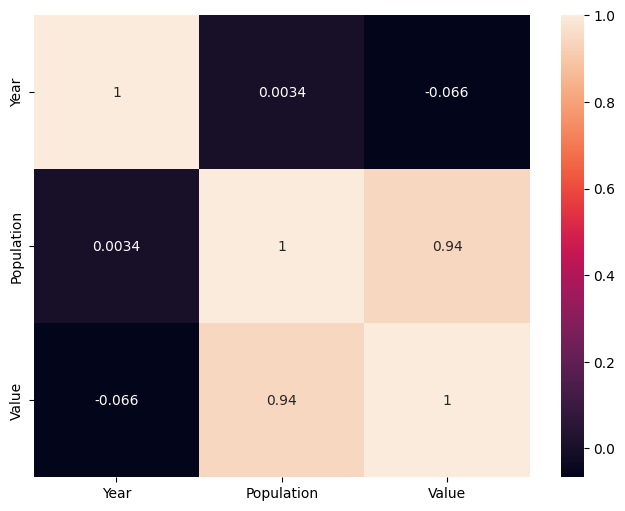

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.groupby(['Province', 'Year', 'Population']).sum(numeric_only=True)['Value'].reset_index().drop(columns='Province').corr(), annot=True)
plt.show()

In [14]:
# Looking at the distribution of values

fig = px.histogram(data_frame= df.groupby(['Province', 'Year', 'Population']).sum(numeric_only=True)['Value'].reset_index(),
                   x = 'Value',
                   title= 'Distribution of the crime rates over the year')
fig.show()

In [106]:
# Scatter plot and linear regression with Plotly and Statsmodels
fig = px.scatter(data_frame= df.groupby(['Province', 'Year', 'Population']).sum(numeric_only=True)['Value'].reset_index(),
           x = 'Population',
           y = 'Value',
           color= 'Province',
           hover_data= ['Province', 'Year'],
           trendline= "ols",
           trendline_scope= 'overall',
           title = 'Relationship between population and crime rates')

fig.show()

results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:28:25   Log-Likelihood:                -19743.
No. Observations:                1681   AIC:                         3.949e+04
Df Residuals:                    1679   BIC:                         3.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.335e+04   1020.687    -22.873      0.0

Looking at the plot, it is confirmed that bigger cities tend to have more crime rates.

### A focus on the cybercrimes rate

In [104]:
cyber_crime_df = df.loc[df['Crime'] == 'delitti informatici']
cyber_crime_df_groupby = cyber_crime_df.groupby('Year').sum(numeric_only=True)['Value'].reset_index()

fig = px.scatter(data_frame= cyber_crime_df_groupby,
              x = 'Year',
              y = 'Value',
              trendline='ols',
              trendline_color_override= 'red',
              title= 'Trend of cybercrimes over the years (OLS)')
fig.show()


fig = px.scatter(data_frame= cyber_crime_df_groupby,
              x = 'Year',
              y = 'Value',
              trendline='lowess',
              trendline_color_override= 'red',
              title= 'Trend of cybercrimes over the years (Lowess)')
fig.show()